In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/ComputerVision-AmazonGo/Data/Train"
valid_image_files_path = "/content/drive/MyDrive/ComputerVision-AmazonGo/Data/Validation"


In [ ]:
label = ['BanhMy','BiaNuocNgot','HoaQua','Rau']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path, # Đường dẫn tới ảnh huấn luyện
    target_size=(50,50), # Biến đổi các ảnh huấn luyện về cùng một kích thước [50x50]
    class_mode='categorical') # Phân loại ảnh đa lớp(4 lớp)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(50, 50),
    class_mode='categorical')



Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#Lớp CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))

#Lớp CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

#lớp ẩn
model.add(Dense(512,activation=tf.nn.relu))

#lớp output
model.add(Dense(4,activation=tf.nn.softmax)) # 4 đầu ra

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])



In [ ]:
EPOCHS=100
history=model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=2)

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 2.3982 - acc: 0.3125

2/2 [==============================] - 18s 16s/step - loss: 2.3982 - acc: 0.3125 - val_loss: 2.0342 - val_acc: 0.2500
Epoch 2/100
2/2 [==============================] - 1s 497ms/step - loss: 1.6047 - acc: 0.2708
Epoch 3/100
2/2 [==============================] - 1s 192ms/step - loss: 1.2559 - acc: 0.5833
Epoch 4/100
2/2 [==============================] - 1s 380ms/step - loss: 1.2316 - acc: 0.4531
Epoch 5/100
2/2 [==============================] - 1s 463ms/step - loss: 1.3624 - acc: 0.4062
Epoch 6/100
2/2 [==============================] - 1s 605ms/step - loss: 0.9914 - acc: 0.8125
Epoch 7/100
2/2 [==============================] - 1s 390ms/step - loss: 0.6806 - acc: 0.9167
Epoch 8/100
2/2 [==============================] - 1s 418ms/step - loss: 1.8342 - acc: 0.2969
Epoch 9/100
2/2 [==============================] - 1s 271ms/step - loss: 1.1107 - acc: 0.5208
Epoch 10/100
2/2 [==============================] - 1s 391ms/step - loss: 0.5322 - acc: 0.9219
Epoch 11/100
2/2 [=================

Saving 13.jpg to 13 (1).jpg
1/1 [==============================] - 0s 123ms/step
[[1. 0. 0. 0.]]
Giá trị dự đoán: BanhMy


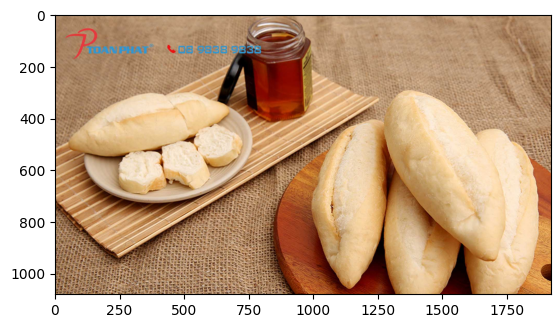

In [ ]:
from google.colab import files
from PIL import Image


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    plt.imshow(mpimg.imread(path))

    img = Image.open(path)  # Sử dụng PIL để tải ảnh
    img = img.resize((50, 50))  # Điều chỉnh kích thước ảnh
    x = np.array(img)  # Chuyển ảnh sang mảng numpy
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)

    print(y_predict)
    print('Giá trị dự đoán:', label[np.argmax(y_predict)])